In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
import model.util as model_util
import model.cnn as cnn
import feature.simulated_dataset as simulated_dataset
import feature.util as feature_util
import train.train_model as train_model
import train.performance as performance
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logomaker
import scipy.signal
import scipy.special
import tqdm.notebook

In [2]:
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"

### Define constants and paths

In [3]:
base_path = "/projects/site/gred/resbioai/tsenga5/mechint_regnet/"

In [4]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/spi1_sanit_single/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_sanit_single_config.json")
# neg_motif_config_path = None

In [5]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/spi1_exp_single/standard_cnn/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_exp_single_config.json")
# neg_motif_config_path = None

In [6]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/tal_gata_sanit_mix/4/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/tal_gata_sanit_mix_config.json")
# neg_motif_config_path = None

In [7]:
# model_path = os.path.join(base_path, "models/trained_models/tal_gata_exp_mix/standard_cnn/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/tal_gata_exp_mix_config.json")
# neg_motif_config_path = None

In [8]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_sanit_coop_noneg/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_config.json")
# neg_motif_config_path = None

In [9]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_exp_coop_noneg/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_config.json")
# neg_motif_config_path = None

In [10]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_sanit_coop/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_neg_config.json")

In [11]:
model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_exp_coop/standard_cnn/3/last_ckpt.pth")
motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_config.json")
neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_neg_config.json")

In [12]:
# model_path = os.path.join(base_path, "models/trained_models/standard_cnn/spi1_ctcf_exp_repress/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_neg_config.json")

In [13]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/jund_tead_sanit_hard_spacing/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/jund_tead_sanit_hard_spacing_config.json")
# neg_motif_config_path = None

In [14]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated/jund_tead_exp_hard_spacing/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_sparsemax/jund_tead_exp_hard_spacing/1/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_attentreg/jund_tead_exp_hard_spacing/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/jund_tead_exp_hard_spacing_config.json")
# neg_motif_config_path = None

In [15]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_soft_spacing_config.json")
# neg_motif_config_path = None

In [16]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_soft_spacing_config.json")
# neg_motif_config_path = None

In [17]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_both_noneg/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_config.json")
# neg_motif_config_path = None

In [18]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_both_noneg/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json")
# neg_motif_config_path = None

In [19]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_both/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_neg_config.json")

In [20]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_both/standard_cnn/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_neg_config.json")

In [21]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e3/ctcf_exp_soft_spacing/1/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e4/ctcf_exp_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/ctcf_exp_soft_spacing_config.json")
# neg_motif_config_path = None

### Import model and create data loader

In [24]:
model = model_util.load_model(
    cnn.ConvNet, model_path
).to(DEVICE)

In [25]:
data_loader = simulated_dataset.dataset_ex.run(
    "create_data_loader", config_updates={
        "motif_config_path": motif_config_path,
        "input_length": 500,
        "motif_center_dist_bound": 50,
        "batch_size": 128,
        "num_batches": 1,
        "background_match_reject_prob": 1,
        "neg_motif_config_path": neg_motif_config_path
    }
).result

WARNING - root - Added new config entry: "motif_config_path"
WARNING - root - Added new config entry: "neg_motif_config_path"
WARNING - sim_dataset - No observers have been added to this run
INFO - sim_dataset - Running command 'create_data_loader'
INFO - sim_dataset - Started
/home/tsenga5/miniconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO - sim_dataset - Result: <torch.utils.data.dataloader.DataLoader object at 0x14eb3168a0a0>
INFO - sim_dataset - Completed after 0:00:00


### Run predictions

In [26]:
losses_batched, losses, model_outputs, losses_comps, model_outputs_other, input_data = \
    train_model.run_epoch(data_loader, "eval", model, epoch_num=0, return_extras=True)

	Loss: 0.4041: 100%|███████████████████████████████████████████| 1/1 [00:02<00:00,  2.43s/it]


In [27]:
true_labels, pred_probs = np.squeeze(input_data[1], axis=1), np.squeeze(model_outputs, axis=1)

In [28]:
for key, val in losses_comps.items():
    print("%s: %6.4f" % (key, np.mean(val)))

conv_filter_overlap: 0.0208
conv_filter_l1: 25.4604
pred: 0.4041


In [29]:
conv_acts = model_outputs_other["conv_acts"]  # Shape: N x L' x F

In [30]:
# Extract first-layer convolutional filter weights
conv_weights = model.conv_layers[0][0].weight.detach().cpu().numpy()  # Shape: F x 4 x W

### Compute performance metrics

In [31]:
metrics = performance.compute_performance_metrics(true_labels, pred_probs)
max_key_len = max(len(k) for k in metrics.keys())
for key, val in metrics.items():
    print("%s: %6.4f" % (key.ljust(max_key_len), val))

acc    : 0.8359
pos_acc: 0.7969
neg_acc: 0.8750
auroc  : 0.8979
precis : 0.8644
recall : 0.7969
auprc  : 0.9106


### Visualize convolutional filter weights

In [32]:
def create_dna_logo(matrix, ax=None):
    """
    Creates a DNA logo using the logomaker package.
    Arguments:
        `matrix`: an L x 4 array of values to plot, in ACGT order
        `ax`: Axes object on which to plot
    Returns the resulting Logo object.
    """
    data = pd.DataFrame(matrix, columns=["A", "C", "G", "T"])
    logo = logomaker.Logo(data, ax=ax)
    return logo

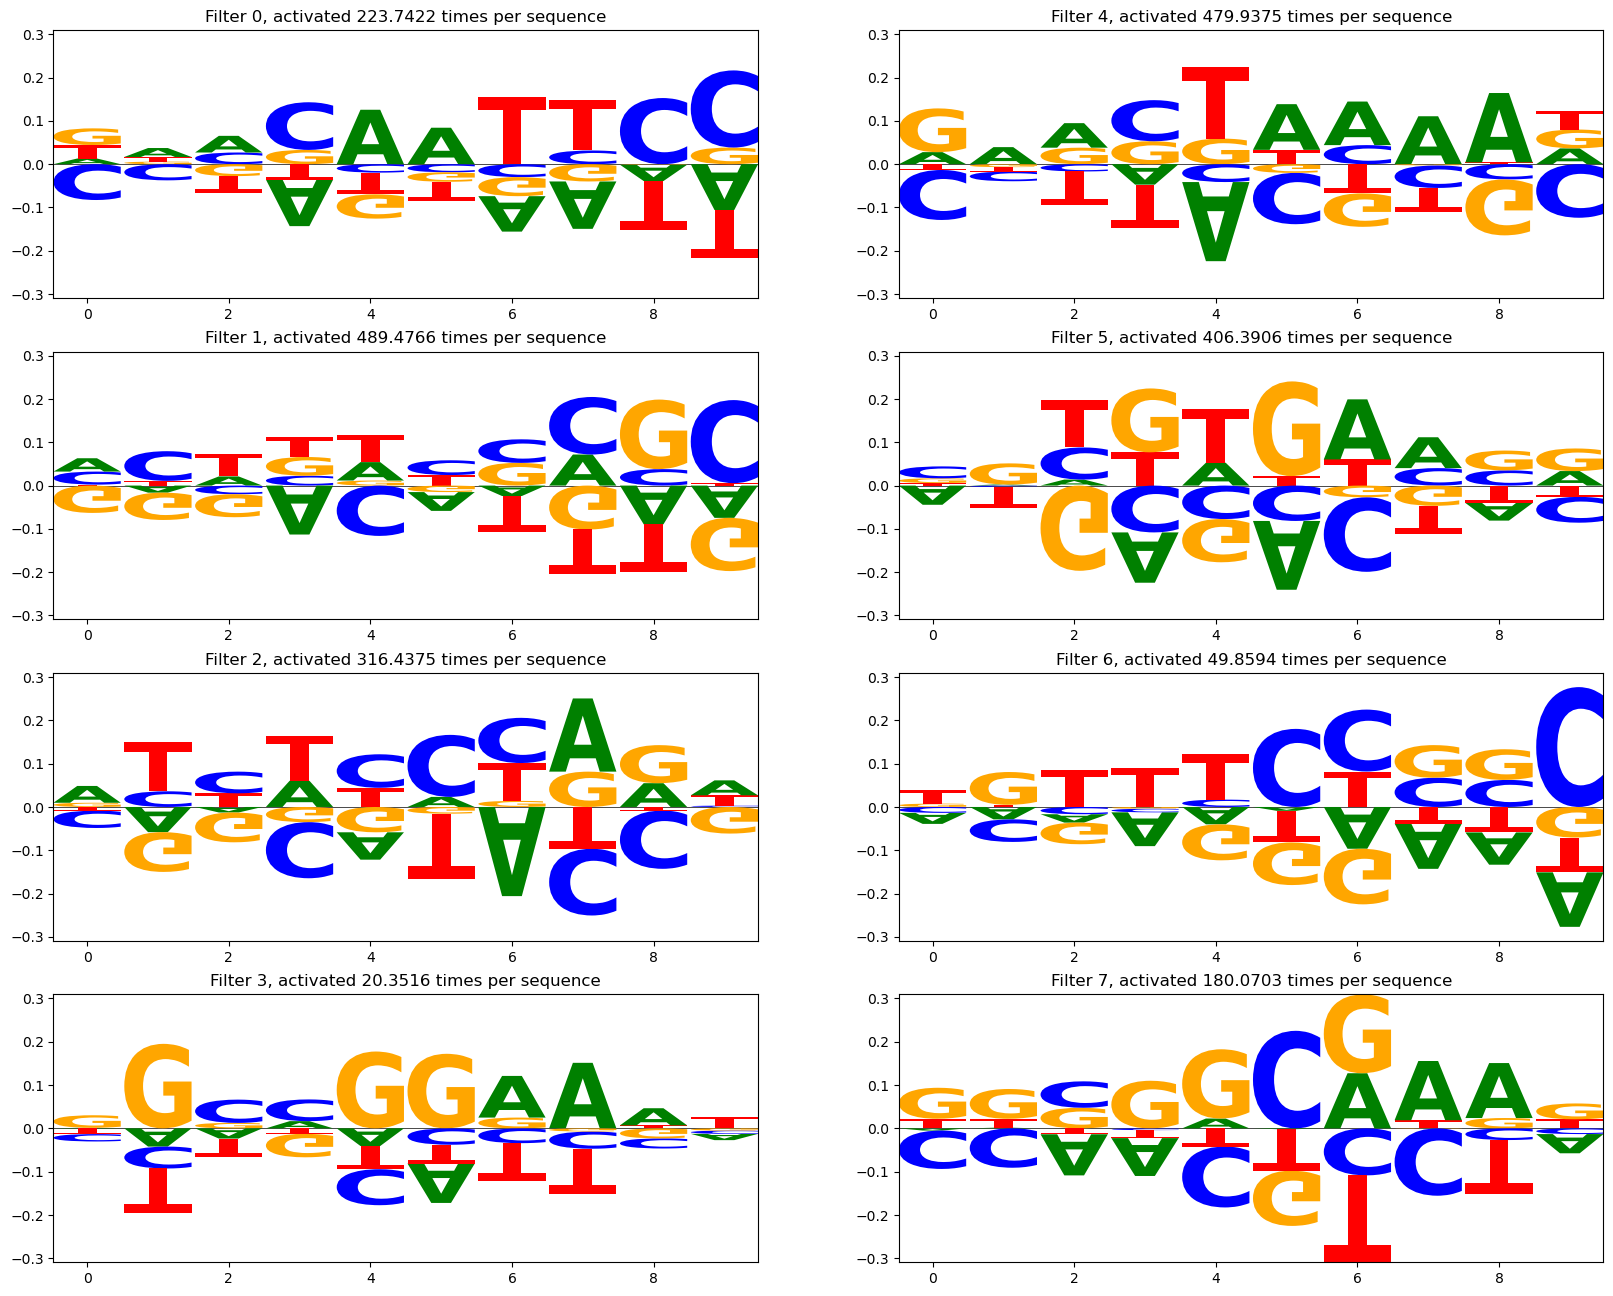

In [33]:
average_act_counts = np.mean(np.sum(conv_acts > 0, axis=1), axis=0)
num_cols = 2
num_rows = int(np.ceil(len(conv_weights) / 2))
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
if len(ax.shape) == 1:
    ax = ax[None]

# Mean-center
conv_weights_centered = conv_weights - np.mean(conv_weights, axis=1, keepdims=True)

min_height = np.min(np.sum(np.minimum(conv_weights_centered, 0), axis=1))
max_height = np.max(np.sum(np.maximum(conv_weights_centered, 0), axis=1))
ylims = (min_height, max_height)
for filter_i in range(conv_weights.shape[0]):
    i, j = filter_i % num_rows, filter_i // num_rows
    
    weights = np.transpose(conv_weights_centered[filter_i])
    
    create_dna_logo(weights, ax=ax[i, j])
    ax[i, j].set_ylim(ylims)
    ax[i, j].set_title("Filter %d, activated %.4f times per sequence" % (filter_i, average_act_counts[filter_i]))
plt.show()

### Quantify interpretability

**Compare filter weights to true motif PFMs**

In [34]:
def compute_pfm_similarity(pfm_1, pfm_2):
    """
    Given an L1 x 4 NumPy array and L2 x 4 NumPy array, computes the
    similarity between them as the maximum sliding cross correlation.
    """
    # L1-normalize both
    pfm_1 = pfm_1 / np.sum(np.abs(pfm_1), axis=1, keepdims=True)
    pfm_2 = pfm_2 / np.sum(np.abs(pfm_2), axis=1, keepdims=True)

    return np.max(scipy.signal.correlate(pfm_1, pfm_2, mode="valid"))

In [35]:
# Import true PFMs
with open(motif_config_path, "r") as f:
    motif_config = json.load(f)
motif_files = motif_config["motif_files"]
if neg_motif_config_path:
    with open(neg_motif_config_path, "r") as f:
        neg_motif_config = json.load(f)
    motif_files.extend(neg_motif_config["motif_files"])
motif_files = list(set(motif_files))

true_pfms = {}
for motif_file in motif_files:
    true_pfms.update(feature_util.import_meme_motifs(motif_file))

In [36]:
# For each filter, compute the closest true PFM
for filter_i in range(len(conv_weights)):
    filter_weights = np.transpose(conv_weights[filter_i])
    filter_weights = scipy.special.softmax(filter_weights, axis=1)
    filter_weights_rc = np.flip(filter_weights)

    pfm_sims = {
        pfm_key : compute_pfm_similarity(filter_weights, pfm)
        for pfm_key, pfm in true_pfms.items()
    }
    pfm_sims_rc = {
        pfm_key : compute_pfm_similarity(filter_weights_rc, pfm)
        for pfm_key, pfm in true_pfms.items()
    }
    all_pfm_sims = pfm_sims.copy()
    all_pfm_sims.update({key + "_RC" : sim for key, sim in pfm_sims_rc.items()})
    print("%d\t%s" % (
        filter_i,
        "\t".join(["%s:%.3f" % (key, all_pfm_sims[key]) for key in sorted(all_pfm_sims, key=(lambda k: -all_pfm_sims[k]))])
    ))

0	E2F6_sanit_RC:2.046	E2F6_exp_RC:2.044	E2F6_exp:1.962	E2F6_sanit:1.958	MAX_sanit:1.573	MAX_sanit_RC:1.573	MAX_exp:1.570	MAX_exp_RC:1.570
1	E2F6_sanit_RC:2.057	E2F6_exp_RC:2.047	E2F6_exp:1.990	E2F6_sanit:1.984	MAX_sanit_RC:1.553	MAX_sanit:1.553	MAX_exp:1.553	MAX_exp_RC:1.552
2	E2F6_sanit_RC:2.103	E2F6_exp_RC:2.089	E2F6_sanit:2.030	E2F6_exp:2.021	MAX_sanit_RC:1.581	MAX_sanit:1.581	MAX_exp:1.580	MAX_exp_RC:1.580
3	E2F6_sanit:2.216	E2F6_exp:2.191	E2F6_sanit_RC:2.001	E2F6_exp_RC:1.994	MAX_sanit:1.533	MAX_sanit_RC:1.533	MAX_exp_RC:1.531	MAX_exp:1.530
4	E2F6_sanit:2.094	E2F6_exp:2.078	E2F6_exp_RC:1.994	E2F6_sanit_RC:1.992	MAX_sanit_RC:1.534	MAX_sanit:1.534	MAX_exp:1.534	MAX_exp_RC:1.533
5	E2F6_sanit:2.157	E2F6_exp:2.135	E2F6_sanit_RC:1.987	E2F6_exp_RC:1.977	MAX_sanit:1.652	MAX_sanit_RC:1.652	MAX_exp_RC:1.649	MAX_exp:1.647
6	E2F6_sanit_RC:2.243	E2F6_exp_RC:2.210	E2F6_exp:1.934	E2F6_sanit:1.920	MAX_sanit:1.520	MAX_sanit_RC:1.520	MAX_exp:1.518	MAX_exp_RC:1.517
7	E2F6_sanit:2.154	E2F6_exp:2.131	

**Compute performance drop on sequences with different background composition**

In [37]:
# Create several backgrounds based on GC content
gc_percs_to_try = np.arange(0.1, 1.0, 0.1)
all_metrics = []
for gc_perc in gc_percs_to_try:
    gc_perc_half = gc_perc / 2
    
    # Create alternative data loader with different background
    alt_data_loader = simulated_dataset.dataset_ex.run(
        "create_data_loader", config_updates={
            "motif_config_path": motif_config_path,
            "input_length": 500,
            "motif_center_dist_bound": 50,
            "batch_size": 128,
            "num_batches": 1,
            "background_match_reject_prob": 1,
            "neg_motif_config_path": neg_motif_config_path,
            "bg_seq_freqs": np.array([0.5 - gc_perc_half, gc_perc_half, gc_perc_half, 0.5 - gc_perc_half])
        }
    ).result

    # Run batch
    alt_losses_batched, alt_losses, alt_model_outputs, alt_losses_comps, alt_model_outputs_other, alt_input_data = \
        train_model.run_epoch(alt_data_loader, "eval", model, epoch_num=0, return_extras=True)

    # Compute performance
    alt_true_labels, alt_pred_probs = np.squeeze(alt_input_data[1], axis=1), np.squeeze(alt_model_outputs, axis=1)
    metrics = performance.compute_performance_metrics(alt_true_labels, alt_pred_probs)
    all_metrics.append(metrics)

WARNING - root - Added new config entry: "motif_config_path"
WARNING - root - Added new config entry: "neg_motif_config_path"
WARNING - sim_dataset - No observers have been added to this run
INFO - sim_dataset - Running command 'create_data_loader'
INFO - sim_dataset - Started
/home/tsenga5/miniconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO - sim_dataset - Result: <torch.utils.data.dataloader.DataLoader object at 0x14eb314bab50>
INFO - sim_dataset - Completed after 0:00:00
	Loss: 0.1642: 100%|███████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]

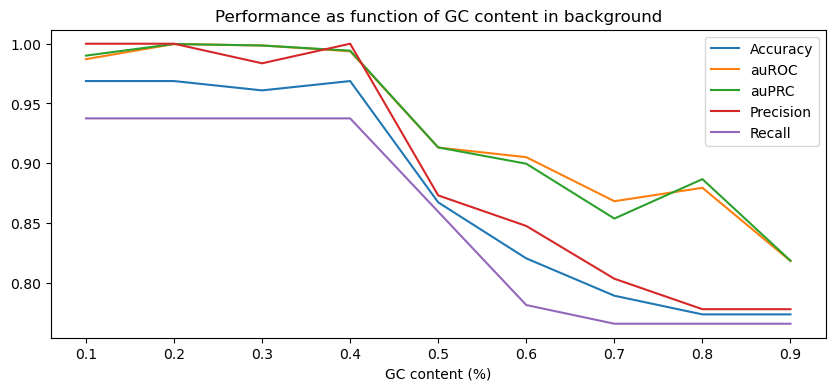

[0.96875, 0.96875, 0.9609375, 0.96875, 0.8671875, 0.8203125, 0.7890625, 0.7734375, 0.7734375]


In [38]:
# Plot metrics as a function of GC content
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(gc_percs_to_try, [metrics["acc"] for metrics in all_metrics], label="Accuracy")
ax.plot(gc_percs_to_try, [metrics["auroc"] for metrics in all_metrics], label="auROC")
ax.plot(gc_percs_to_try, [metrics["auprc"] for metrics in all_metrics], label="auPRC")
ax.plot(gc_percs_to_try, [metrics["precis"] for metrics in all_metrics], label="Precision")
ax.plot(gc_percs_to_try, [metrics["recall"] for metrics in all_metrics], label="Recall")

ax.legend()
ax.set_xlabel("GC content (%)")
ax.set_title("Performance as function of GC content in background")
plt.show()
print([metrics["acc"] for metrics in all_metrics])

In [39]:
true_motifs = data_loader.dataset.possible_motifs
true_motifs_with_rc = true_motifs.copy()
true_motifs_with_rc.update({key + "_RC" : np.flip(val) for key, val in true_motifs.items()})

def check_seq_for_motif_matches(seq, match_score_thresh=0.9, motifs=true_motifs_with_rc):
    """
    Checks whether or not the given ACGT sequence has any motifs in it.
    `motifs` is a dictionary mapping keys to L x 4 PFMs.
    Returns a boolean of whether or not a match was found.
    """
    # Convert sequence to one-hot sequence
    one_hot = feature_util.seqs_to_one_hot([seq])[0]

    # Compute match scores for each motif
    all_match_scores = [
        scipy.signal.correlate(one_hot, m, mode="valid")[:, 0] / len(m) for m in motifs.values()
    ]
    # Convert to boolean arrays
    all_match_bools = [scores >= match_score_thresh for scores in all_match_scores]

    return any(np.any(bools) for bools in all_match_bools)

In [40]:
# Attempt to construct examples of sequences which are predicted positive but do not have any motifs
num_seqs = 100
seq_len = 500
match_score_thresh = 0.8

filter_motifs = np.eye(4)[np.argmax(np.transpose(conv_weights, (0, 2, 1)), axis=2)]
# filter_motifs = np.transpose(conv_weights, (0, 2, 1))

seqs = []
for _ in tqdm.notebook.trange(num_seqs):
    seq = ""
    filter_i = 0
    while len(seq) < seq_len:
        # Loop through filters and sample sequence from it
        sample = data_loader.dataset.pos_seq_simulator._sample_motif_seq(filter_motifs[filter_i])
        filter_i = np.random.choice(len(filter_motifs))

        # Make sure the sampled sequence does not match a motif
        if check_seq_for_motif_matches(sample, match_score_thresh=match_score_thresh):
            # Don't add the sample
            continue
        seq += sample
        
        # Double check that the full sequence so far does not match a motif
        if check_seq_for_motif_matches(seq, match_score_thresh=match_score_thresh):
            # Start over
            seq = ""
    seqs.append(seq)

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
# Run predictions on the constructed sequences
pred_probs = model(torch.tensor(feature_util.seqs_to_one_hot(seqs)).float().to(DEVICE)).detach().cpu().numpy()
print("Number of positives: %d/%d" % (np.sum(pred_probs >= 0.5), len(pred_probs)))

Number of positives: 59/100


In [42]:
# Attempt to construct examples of sequences which have the motif, but are still predicted negative
num_seqs = 100
init_seq_len = 200  # Generate positive sequences of the size...
seq_len = 500  # Then pad to this size

filter_motifs = np.eye(4)[np.argmin(np.transpose(conv_weights, (0, 2, 1)), axis=2)]

mini_data_loader = simulated_dataset.dataset_ex.run(
    "create_data_loader", config_updates={
        "motif_config_path": motif_config_path,
        "input_length": init_seq_len,
        "motif_center_dist_bound": 50,
        "batch_size": num_seqs,
        "num_batches": 1,
        "neg_motif_config_path": neg_motif_config_path
    }
).result

seqs = []
for _ in tqdm.notebook.trange(num_seqs):
    center = mini_data_loader.dataset.pos_seq_simulator.sample_config_seq()
    seq = ""
    filter_i = 0
    while len(seq) < seq_len:
        # Loop through filters and sample sequence from it
        sample = data_loader.dataset.pos_seq_simulator._sample_motif_seq(filter_motifs[filter_i])
        filter_i = np.random.choice(len(filter_motifs))
        seq += sample

    # Insert center piece with motif(s) into background
    start = (len(seq) // 2) - (len(center) // 2)
    end = start + len(center)
    seq = seq[:start] + center + seq[end:]
        
    seqs.append(seq)

WARNING - root - Added new config entry: "motif_config_path"
WARNING - root - Added new config entry: "neg_motif_config_path"
WARNING - sim_dataset - No observers have been added to this run
INFO - sim_dataset - Running command 'create_data_loader'
INFO - sim_dataset - Started
/home/tsenga5/miniconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO - sim_dataset - Result: <torch.utils.data.dataloader.DataLoader object at 0x14eade31d130>
INFO - sim_dataset - Completed after 0:00:00


  0%|          | 0/100 [00:00<?, ?it/s]

In [43]:
# Run predictions on the constructed sequences
pred_probs = model(torch.tensor(feature_util.seqs_to_one_hot(seqs)).float().to(DEVICE)).detach().cpu().numpy()
print("Number of negatives: %d/%d" % (np.sum(pred_probs < 0.5), len(pred_probs)))

Number of negatives: 45/100
